<img style="float: left;padding: 1.3em" src="https://raw.githubusercontent.com/gw-odw/odw-2023/main/Tutorials/logo.png">  

#  Gravitational Wave Open Data Workshop


#### Tutorial 1.4: Generating Waveforms

This tutorial shows how to numerically obtain the gravitational waveform radiated during a compact binary coalescence, assuming the basic parameters of the binary are known.

We will be using the [PyCBC](http://github.com/ligo-cbc/pycbc) library, which provides an easy-to-use Python interface to obtain such waveforms. PyCBC can more generally be used to analyze or simulate gravitational-wave data, find or simulate astrophysical signals from compact binary mergers, and study their parameters. It is one of the tools routinely used by groups within and outside of the LIGO and Virgo collaborations. Additional [examples](http://pycbc.org/pycbc/latest/html/#library-examples-and-interactive-tutorials) and module level documentation are [here](http://pycbc.org/pycbc/latest/html/py-modindex.html).

[Click this link to view this tutorial in Google Colaboratory](https://colab.research.google.com/github/gw-odw/odw-2023/blob/main/Tutorials/Day_1/Tuto_1.4_Generating_waveforms.ipynb)

##  Installation  (execute only if running on a cloud platform or if you haven't done the installation already!)

PyCBC is installable through pip. It relies on portions of the [LALSuite](https://lscsoft.docs.ligo.org/lalsuite/) C-library. A bundled version of this suitable for use with PyCBC is also available on Mac / Linux through pip. **It is recommended** to use [conda](https://docs.ligo.org/lscsoft/conda/) on your own machine, as explained in the [installation instructions](https://github.com/gw-odw/odw-2019/blob/master/setup.md). This usage might look a little different than normal, simply because we want to do this directly from the notebook.

In [1]:
# -- Uncomment following line if running in Google Colab
! pip install -q PyCBC==2.0.5 lalsuite==7.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.5

**Important:** With Google Colab, you may need to restart the runtime after running the cell above.

## Initialization

In [2]:
from pycbc.waveform import get_td_waveform, fd_approximants
import pylab

### Generate your first waveform!

Here we'll generate the gravitational waveform using one of the available waveform approximants. The waveform can be generated as a time series using [`get_td_waveform()`](http://pycbc.org/pycbc/latest/html/pycbc.waveform.html#pycbc.waveform.waveform.get_td_waveform) or in the frequency domain using [`get_fd_waveform()`](http://pycbc.org/pycbc/latest/html/pycbc.waveform.html#pycbc.waveform.waveform.get_fd_waveform).

There are some additional examples using this interface [here](http://pycbc.org/pycbc/latest/html/waveform.html). The key parameters are the masses of the binary (given in solar masses), the time between samples (in seconds), the starting gravitational-wave frequency (Hz) and the name of the approximant we'd like to use. A variety of approximants are available that include different physical effects.

In this example, we've chosen to use the 'IMRPhenomD' approximant. This is an implementation of the model introduced [in this paper](https://arxiv.org/pdf/1508.07253.pdf). There are many other models available, with different methodologies employed and physical effects modelled. A full review of the models is outside of the scope of this tutorial.

In [3]:
# We can list the waveforms available for get_td_waveform and get_fd_waveform

from pycbc.waveform import td_approximants, fd_approximants

# List of td approximants that are available
print('Time domain waveforms: ', td_approximants())

# List of fd approximants that are currently available
print('Frequency domain waveforms: ', fd_approximants())

Time domain waveforms:  ['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'TaylorF2', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_RO

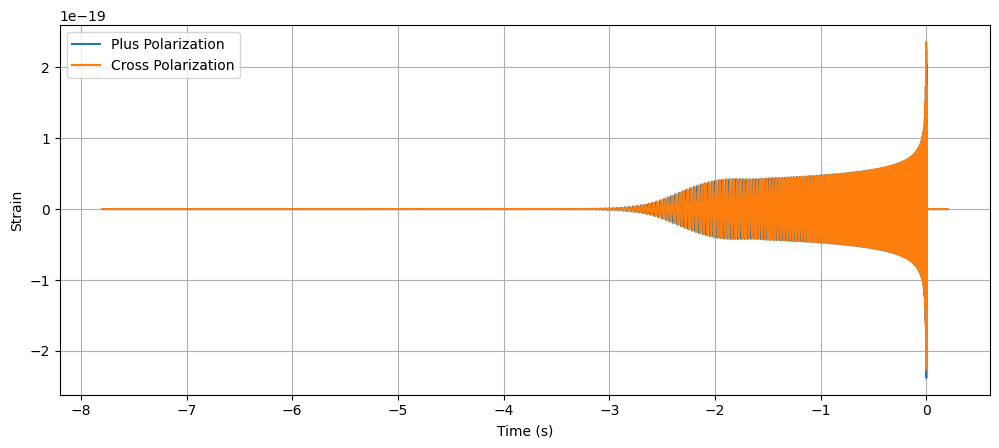

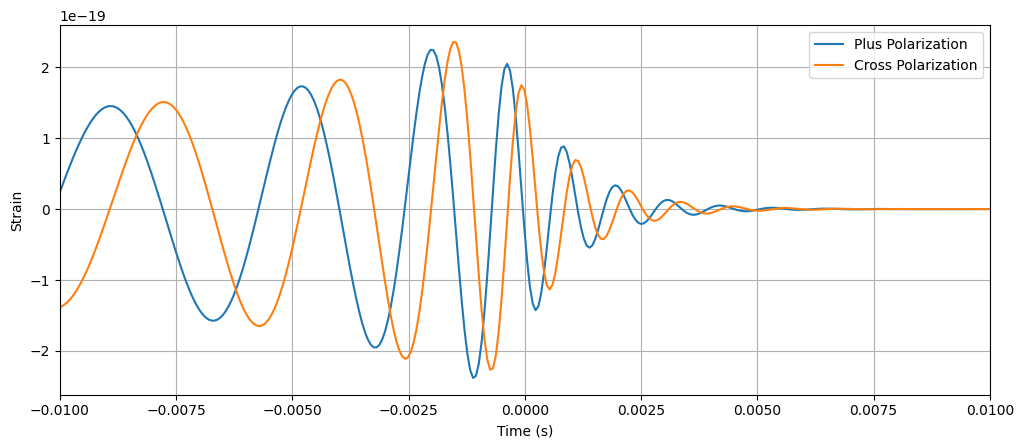

In [4]:
# The outputs of this function are the "plus" and "cross" polarizations
# of the gravitational-wave signal as viewed from the line of sight at
# a given source inclination (assumed face-on, i.e. zero inclination
# if not provided)
hp, hc = get_td_waveform(approximant="IMRPhenomD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/16384,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

We can see that in this case, the two polarizations differ only by the phase of the signal. This is a known property of the signal, when the orbital plane of the binary does not precess (i.e. the individual black holes spins are aligned with the orbital angular momentum). In the zoom-in plot, we can see the merger itself and the ringdown that follows.

We can also generate the same waveform in the frequency domain using the function `get_fd_waveform()`.

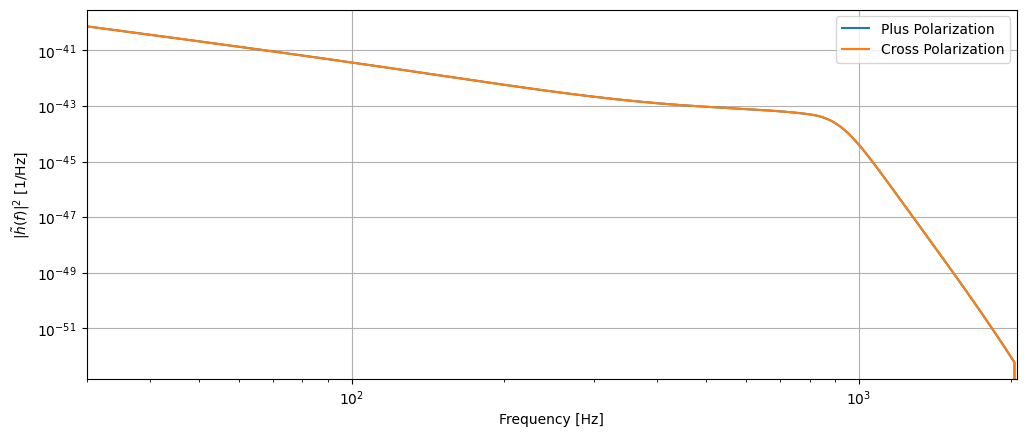

In [5]:
from pycbc.waveform import get_fd_waveform

hp, hc = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/16384,
                         f_lower=30,
                        delta_f=1.)

pylab.figure(figsize=pylab.figaspect(0.4))

# We will plot the squared norm of the Fourier components of the signal polarizations.
# For a face-on binary, the plus and cross polarizations only differ by a phase term. Therefore, the two squared norms will be the same
pylab.loglog(hp.sample_frequencies, hp.squared_norm(), label='Plus Polarization')
pylab.loglog(hp.sample_frequencies, hc.squared_norm(), label='Cross Polarization')
pylab.xlabel('Frequency [Hz]')
pylab.ylabel(r'$|\tilde{h}(f)|^2$ [1/Hz]')
pylab.xlim([30,2048])
pylab.legend()
pylab.grid()
pylab.show()

### How does the waveform change with the mass of the binary?

Below you can see how the length of the waveform increases for lower-mass binary mergers.

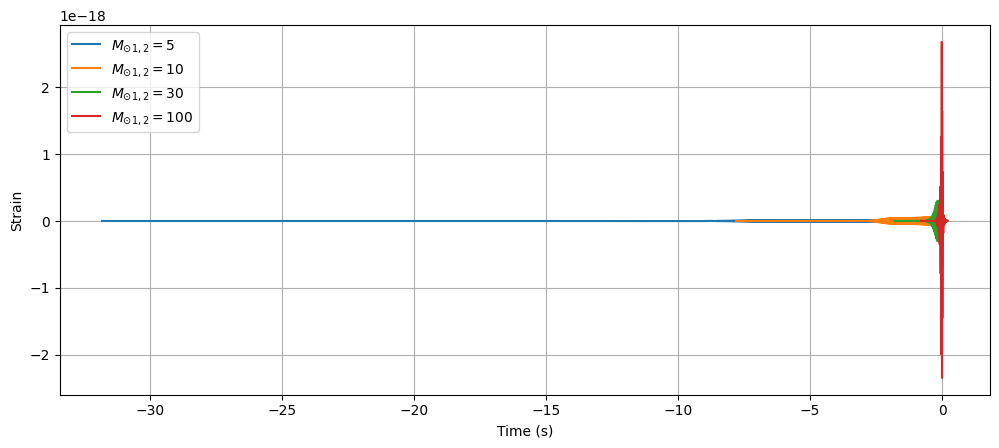

In [6]:
# Component mass of each binary component. We'll simplify here and assume that each
# component of the binary has the same mass. Again, units are in solar masses.
pylab.figure(figsize=pylab.figaspect(0.4))
for m in [5, 10, 30, 100]:
    hp, hc = get_td_waveform(approximant="IMRPhenomD",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/4096,
                         f_lower=30)

    pylab.plot(hp.sample_times, hp, label='$M_{\odot 1,2}=%s$' % m)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

### Changing the distance of the waveform

The luminosity distance of the source is also a parameter when you generate a waveform. The units used are Megaparsecs (i.e. $10^6\mathrm{\,pc}$). Keep in mind that no redshift effects are taken into account here, so there is a simple linear relationship between distance and amplitude.

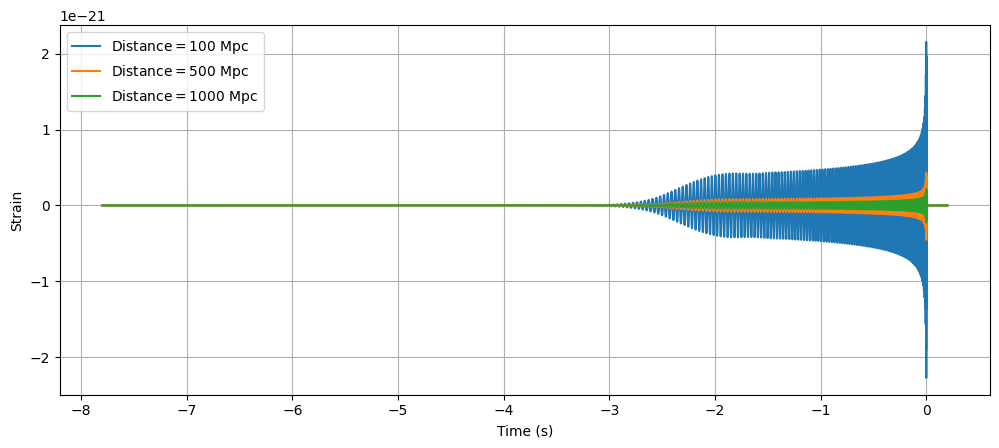

In [7]:
pylab.figure(figsize=pylab.figaspect(0.4))
for d in [100, 500, 1000]:
    hp, hc = get_td_waveform(approximant="IMRPhenomD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d)

    pylab.plot(hp.sample_times, hp, label='Distance$=%s$ Mpc' % d)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

### Exercise

Generate and plot the waveform associated to the binary neutron star merger GW170817. Look up the [GWTC-1](https://www.gw-openscience.org/GWTC-1/) catalog page to obtain the estimated parameters for this source.

How much time does the signal last using a lower frequency of 30 Hz?

In [8]:

# pre cleaning




<Figure size 1200x480 with 0 Axes>

<Figure size 1200x480 with 0 Axes>